# Heart Disease Prediction

Please note that:

**Heart disease**
- Heart disease = 0 means that the person does not have heart disease.
- Heart disease = 1 means that the person has heart disease.

 **Gender**

- sex = 0 means that the person is female.
- sex = 1 means that the person is male.


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
heart = pd.read_csv("heart_v2.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


there are 5 columns and 270 rows

In [3]:
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
heart['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In the dataset there are 150 have no disease and 120 entries is disease.

In [5]:
# Assigning the X and Y for Train and Testing
X = heart.drop('heart disease',axis=1)
y = heart['heart disease']

In [6]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


## Train - test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (189, 4)
X_test (81, 4)


## Building the decision tree 
Use all defualt parameeters expect depth

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3)

In [11]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO


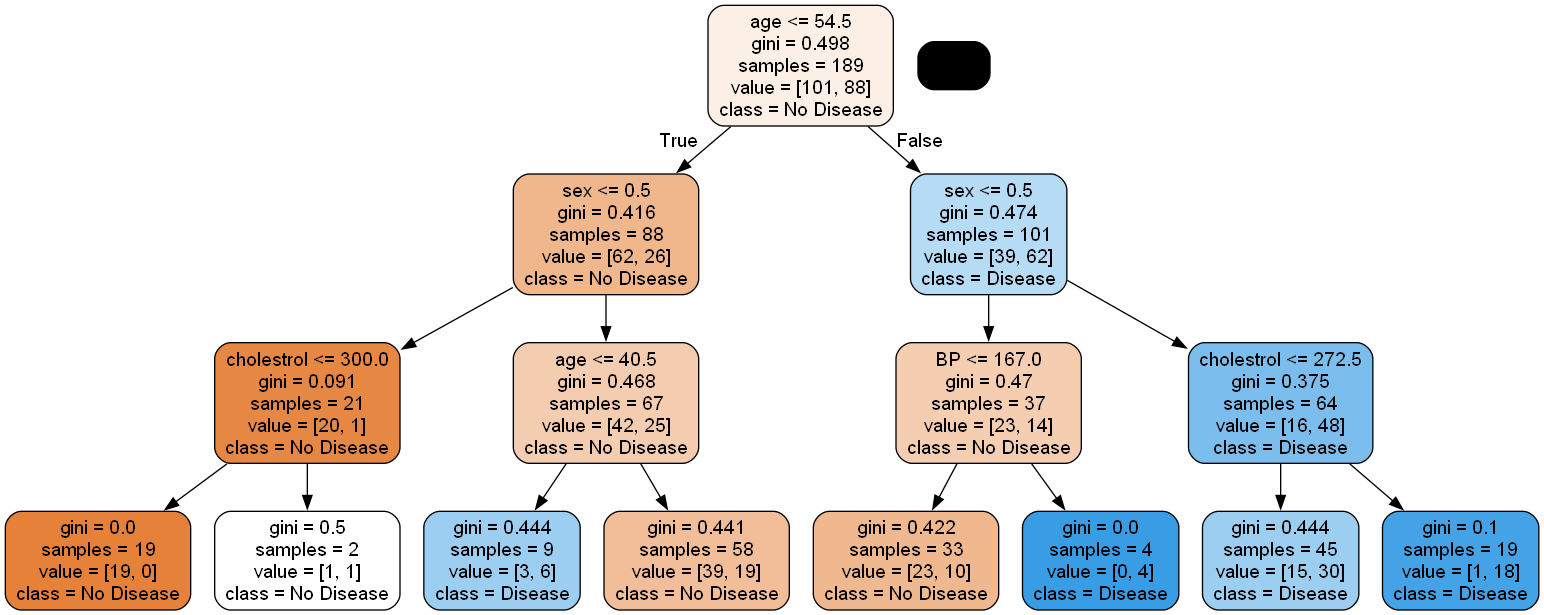

In [13]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               feature_names=X.columns,
               class_names=['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Evaluating the model performance on the test set

In [14]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
print("Train set Perfomance")
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train,y_train_pred)

Train set Perfomance
0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [17]:
print("Test set Performance")
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test, y_test_pred)

Test set Performance
0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

### Creat helper functions to evaluate the model performance and create the graph for DT

In [18]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
               feature_names=X.columns,
               class_names=['No Disease', 'Disease'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph


In [19]:
def evaluate_model(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    print("Train Set Performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print("-"*50)
    print("Test set Performance")
    print(accuracy_score(y_test,y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [20]:
evaluate_model(dt)

Train Set Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set Performance
0.6049382716049383
[[35 14]
 [18 14]]


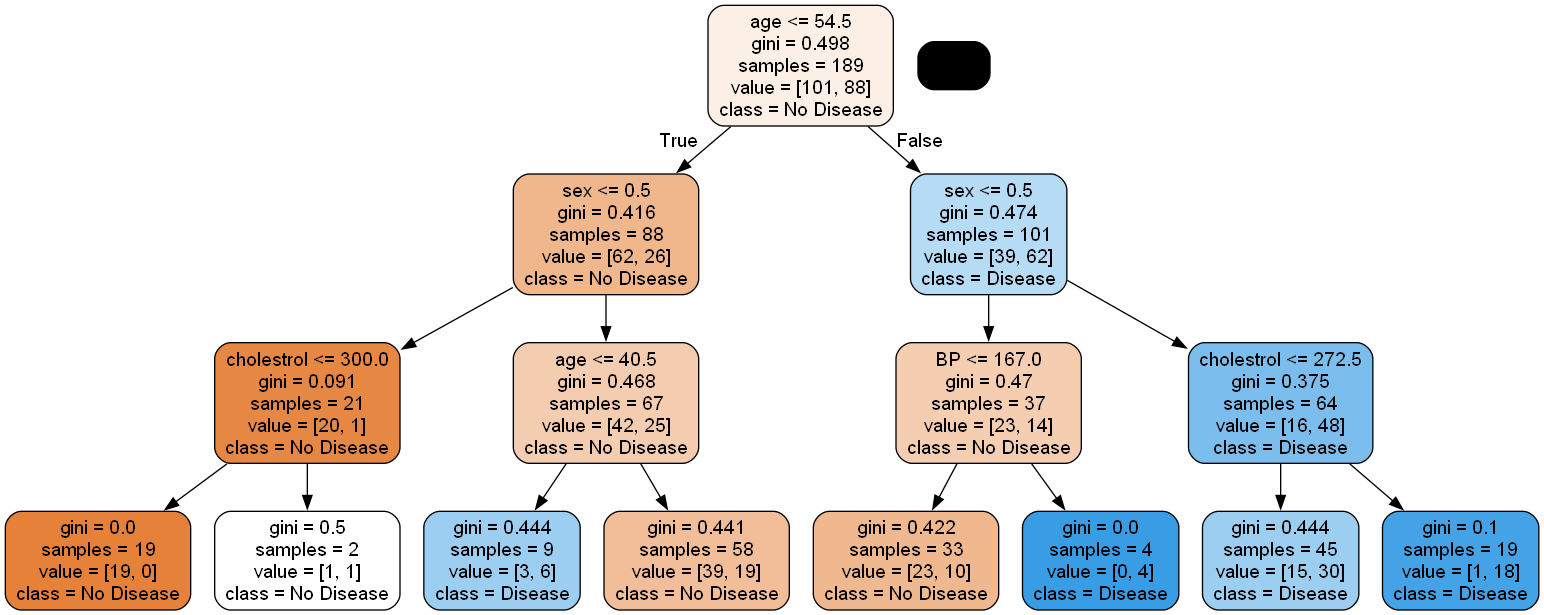

In [21]:
gph = get_dt_graph(dt)
Image(gph.create_png())

### Decision Tree without any hyper_parameter setting

In [22]:
dt_defualt = DecisionTreeClassifier(random_state=42)
dt_defualt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

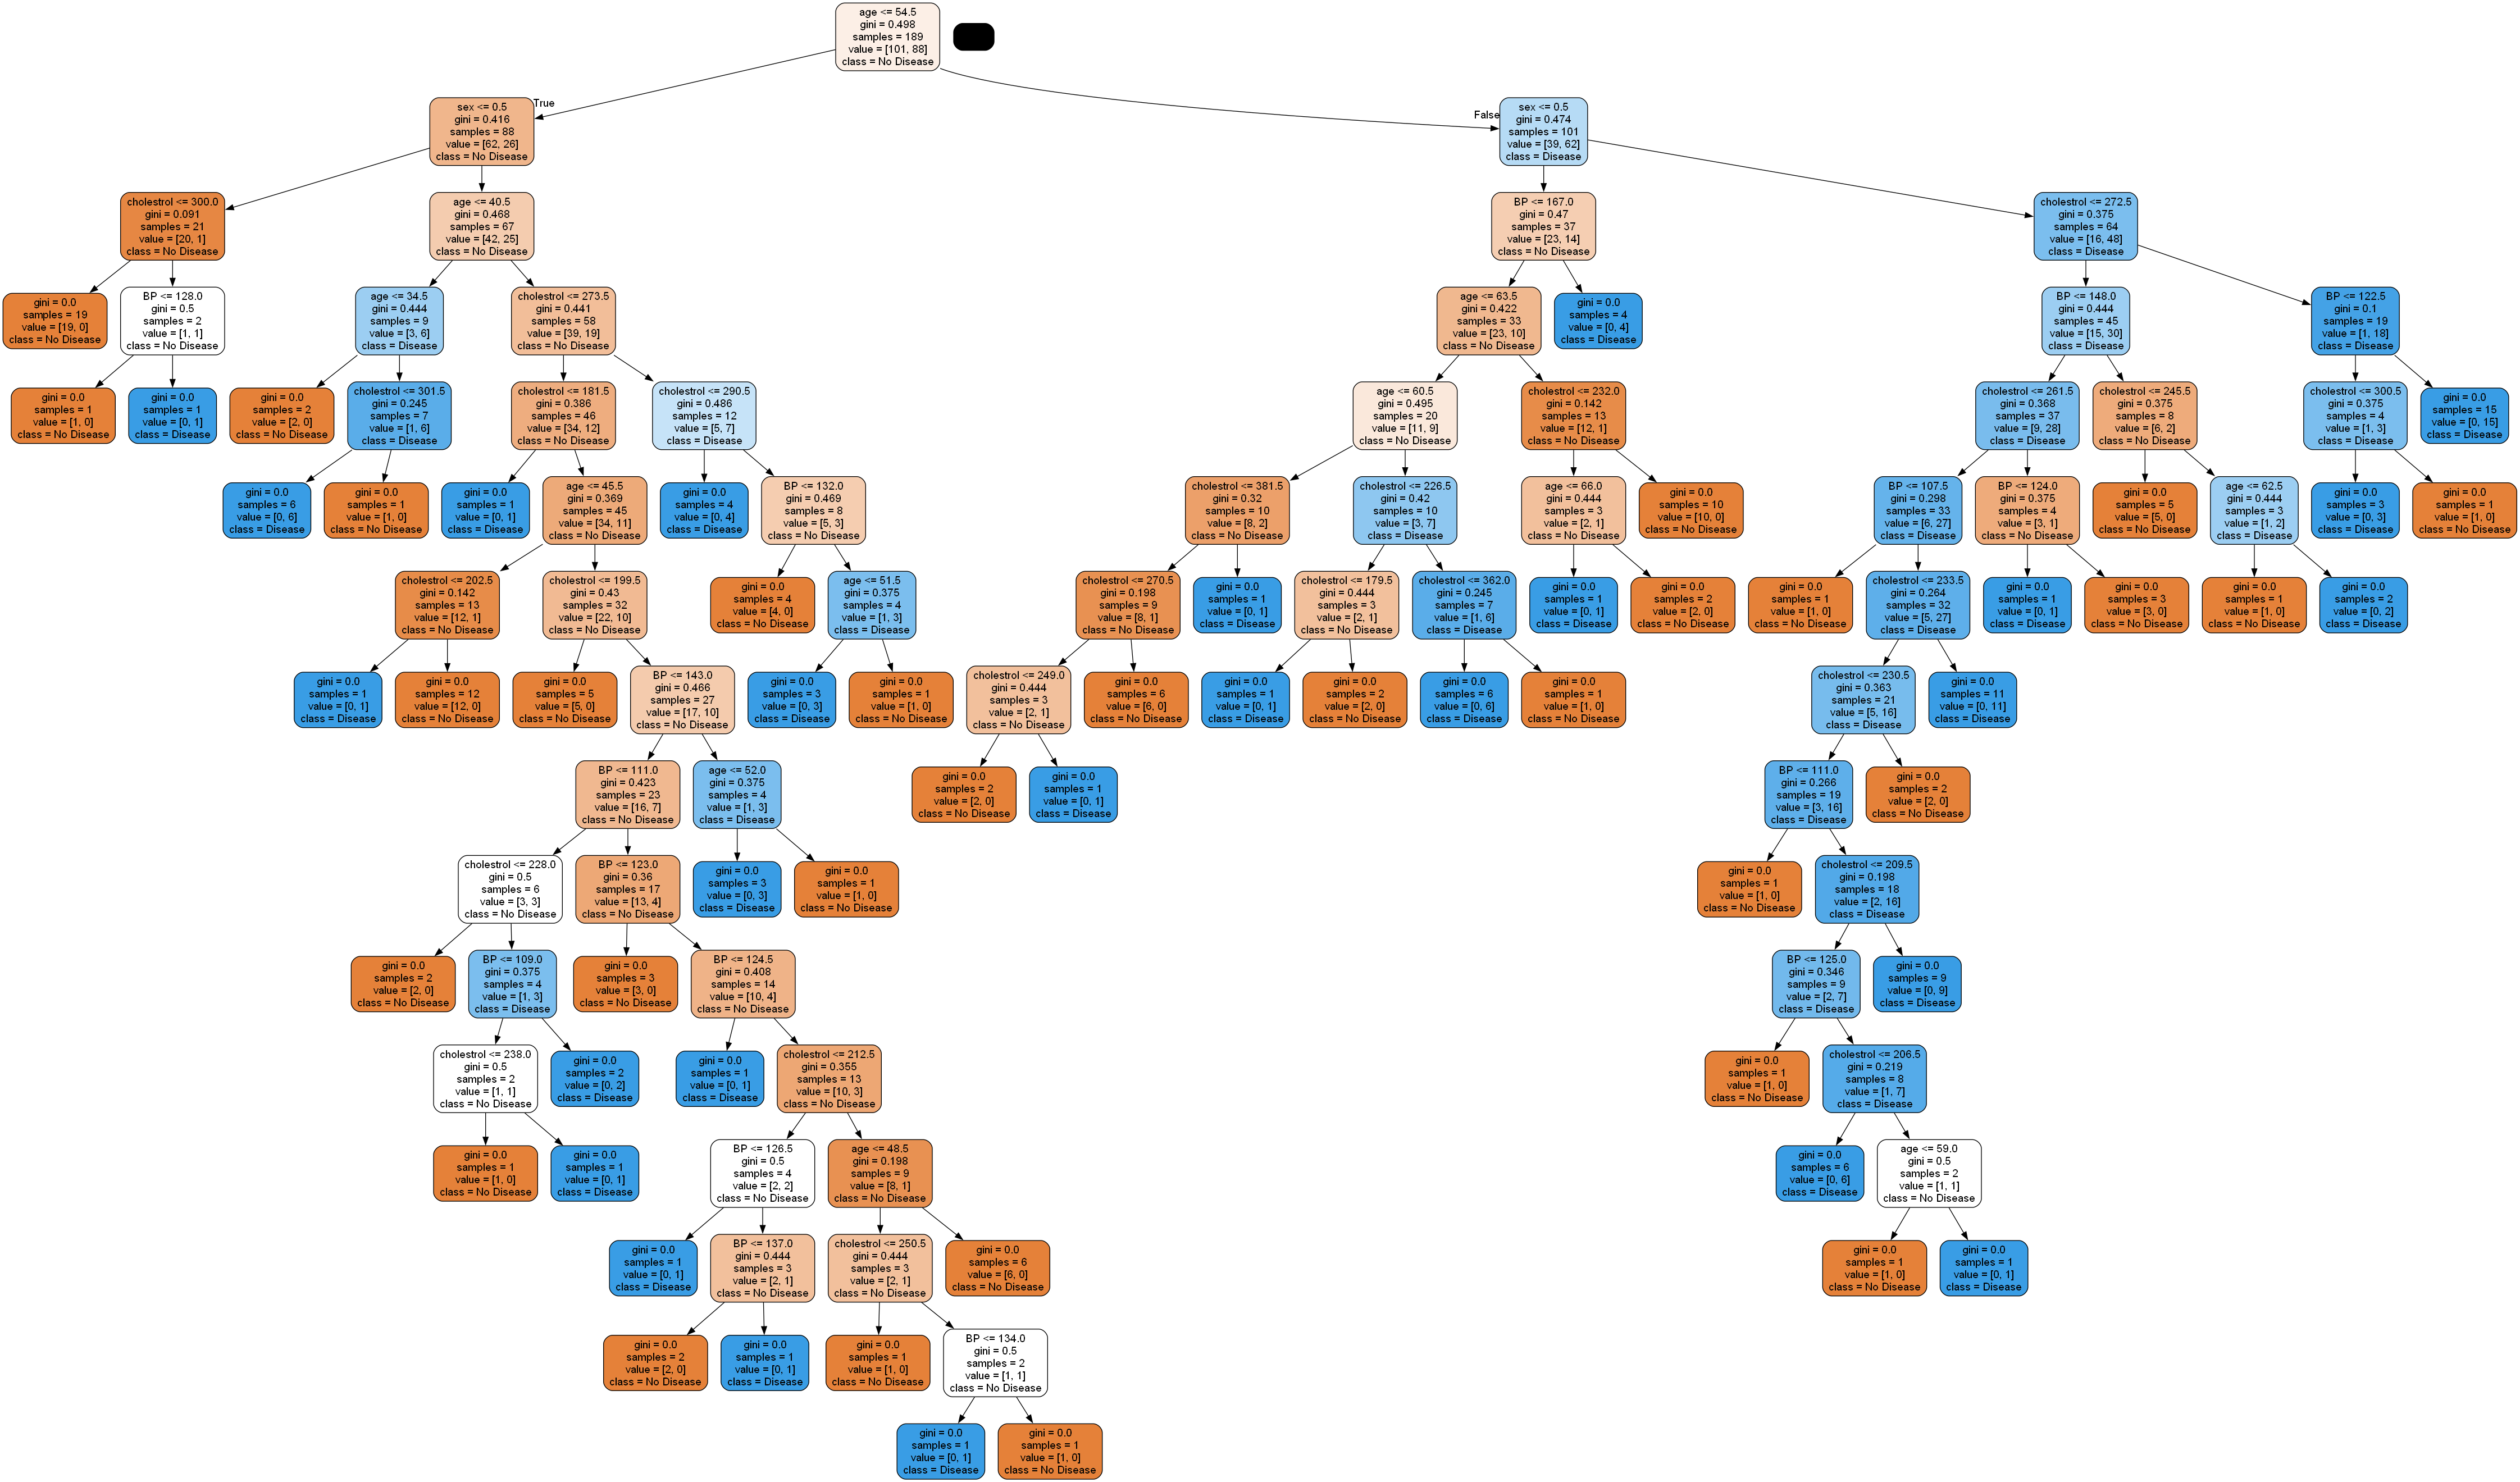

In [23]:
gph = get_dt_graph(dt_defualt)
Image(gph.create_png())

In [24]:
evaluate_model(dt_defualt)

Train Set Performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set Performance
0.6296296296296297
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [25]:
?DecisionTreeClassifier

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [26]:
dt_depth = DecisionTreeClassifier(max_depth=3 , random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

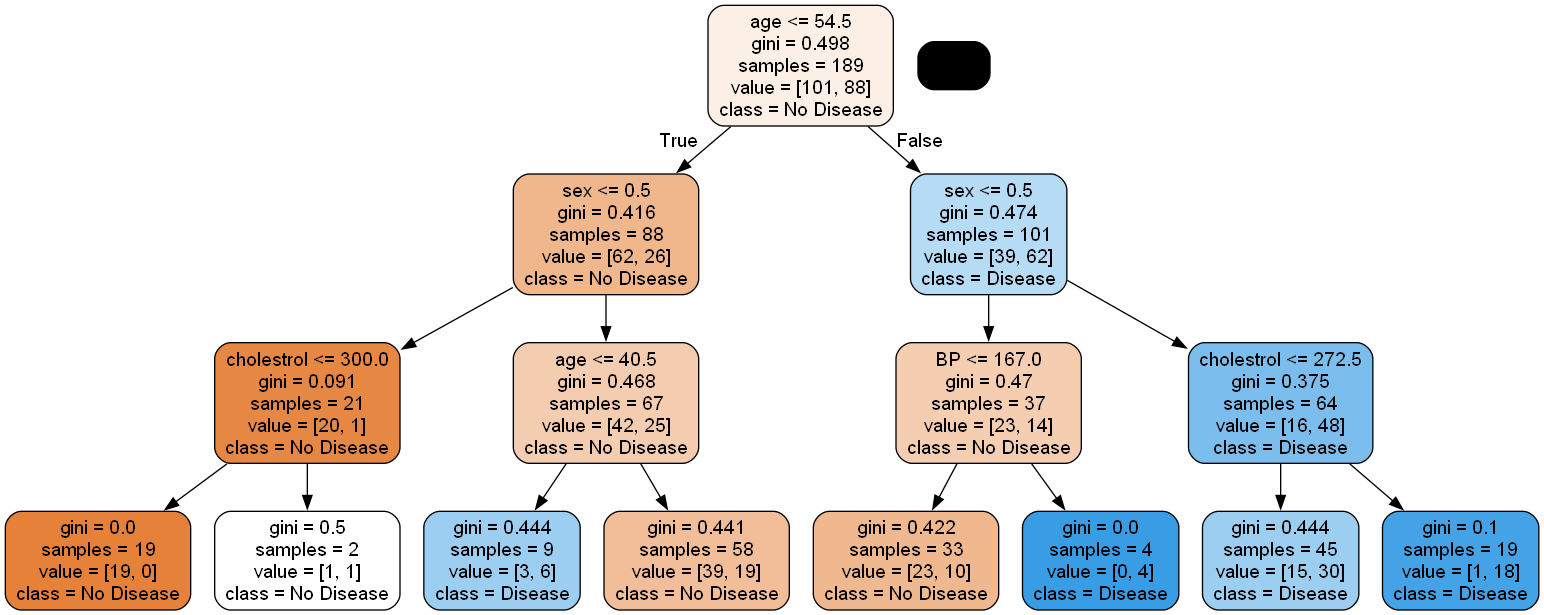

In [27]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [28]:
evaluate_model(dt_depth)

Train Set Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set Performance
0.6049382716049383
[[35 14]
 [18 14]]


### Specifyiing the minimum samples befor split

In [29]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

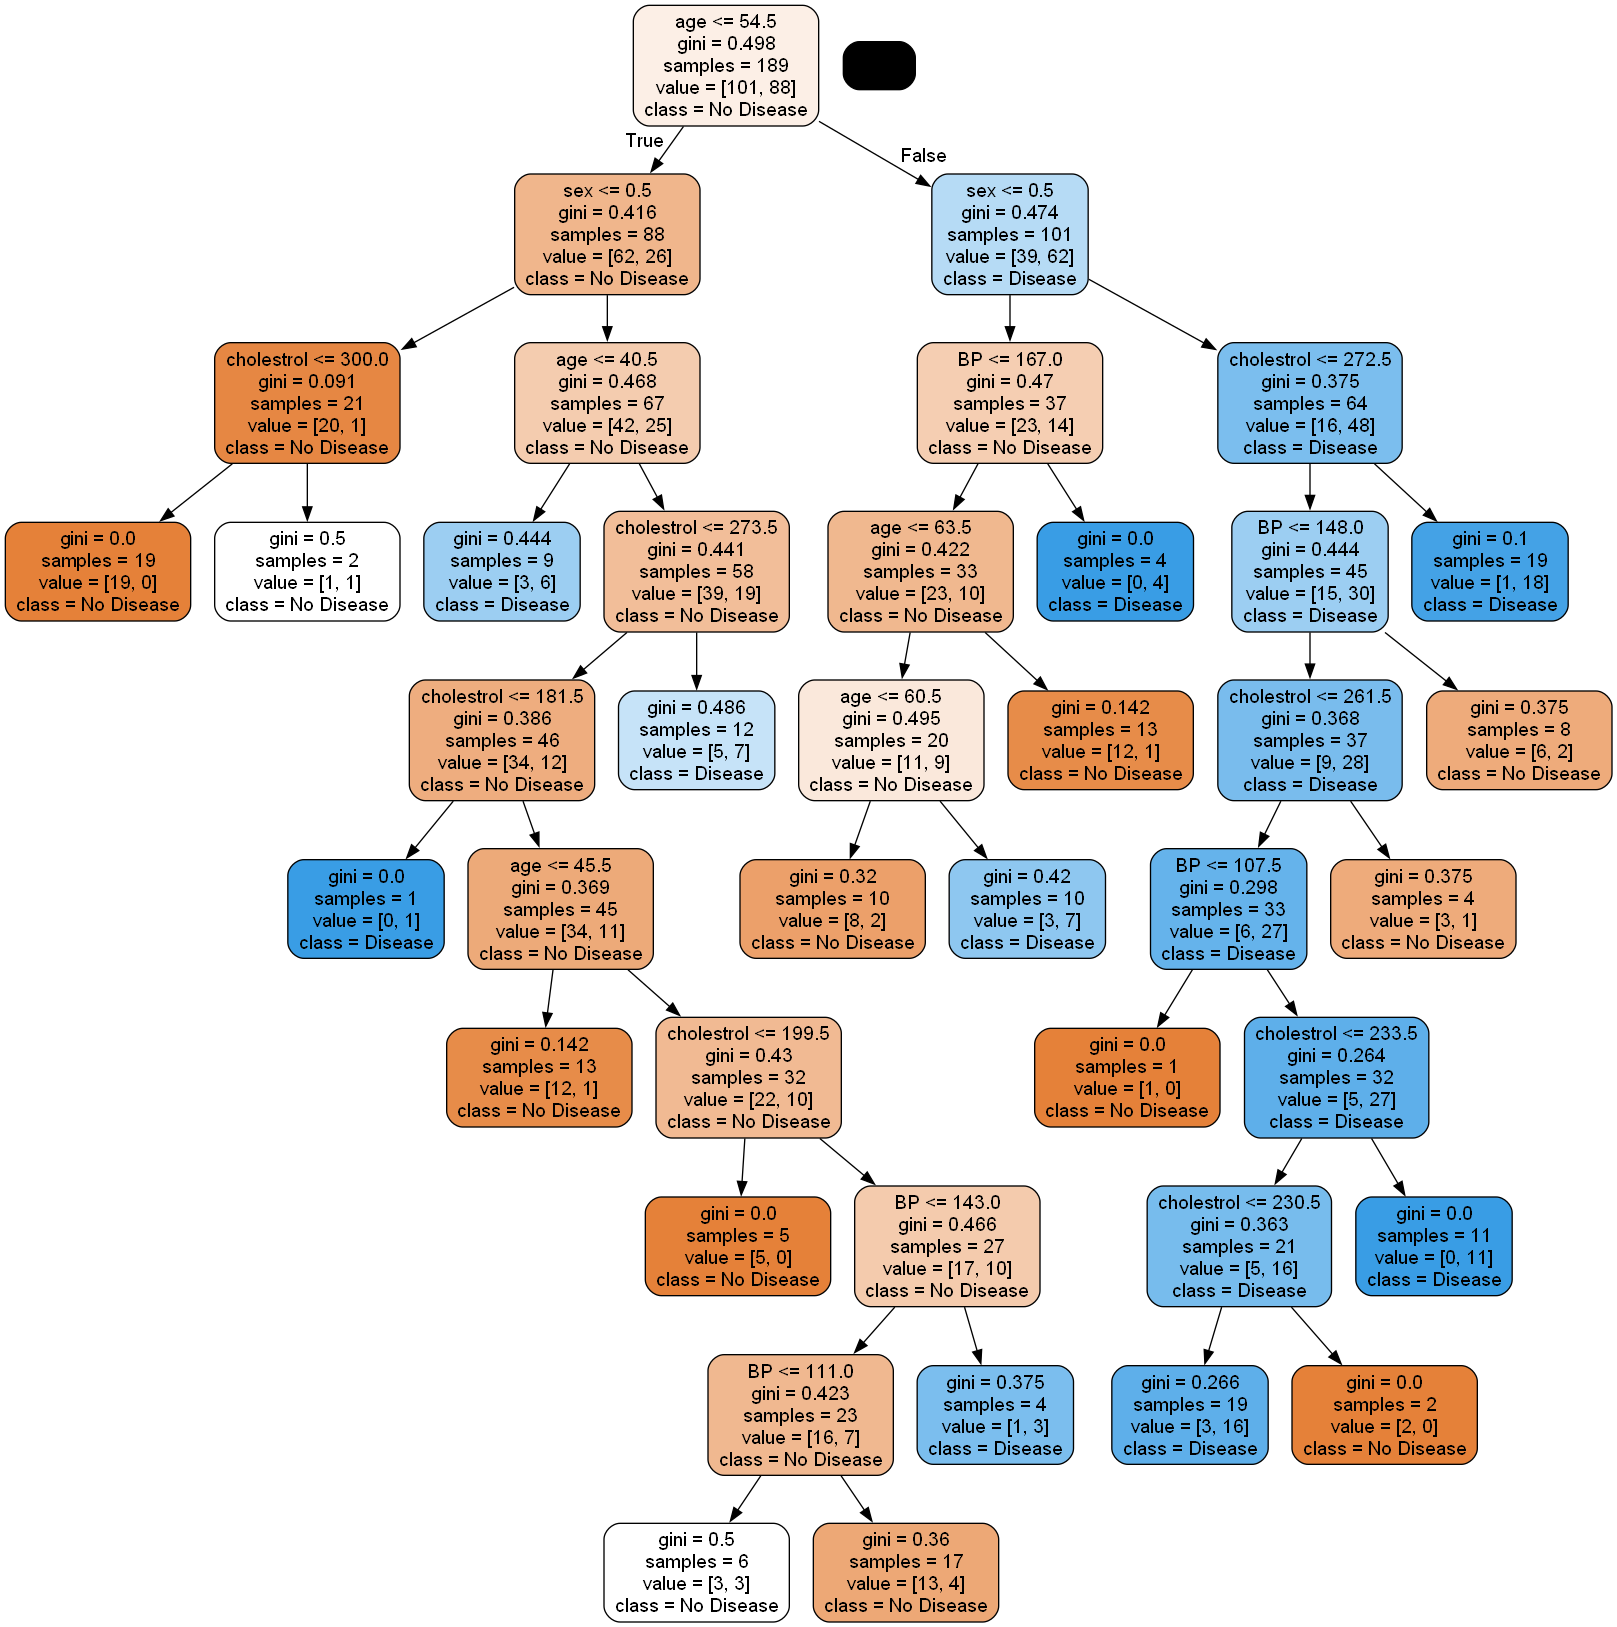

In [30]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [31]:
evaluate_model(dt_min_split)

Train Set Performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set Performance
0.6419753086419753
[[32 17]
 [12 20]]


### Specifyiing the minimum samples in leaf node

In [32]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

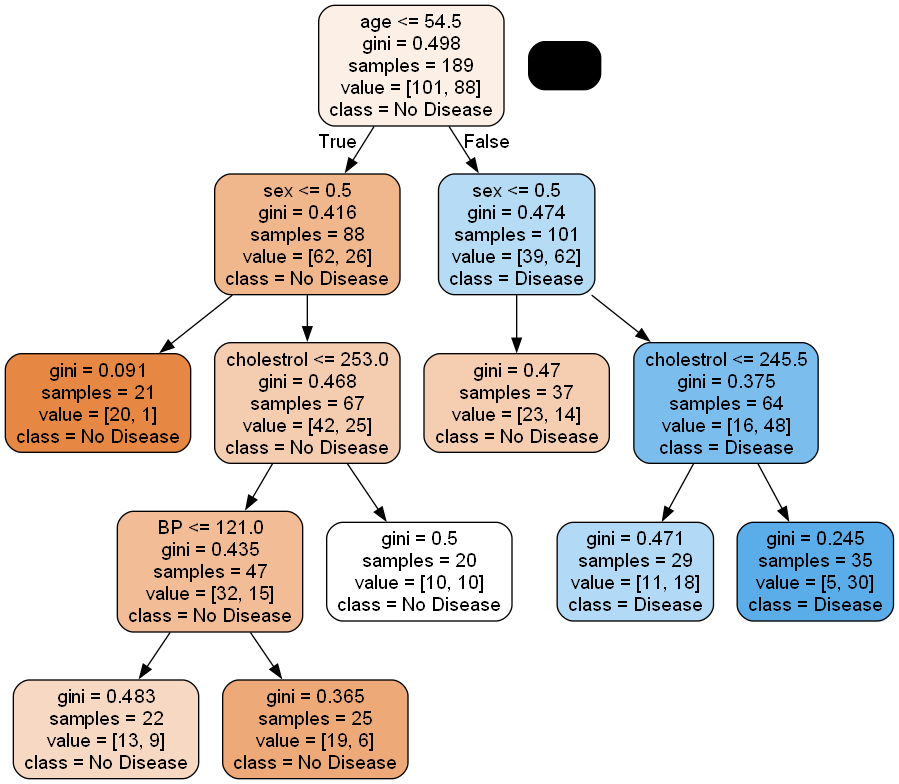

In [33]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [34]:
evaluate_model(dt_min_leaf)

Train Set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set Performance
0.6419753086419753
[[38 11]
 [18 14]]


### Using Entropy istead of Gini

In [35]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion = "entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

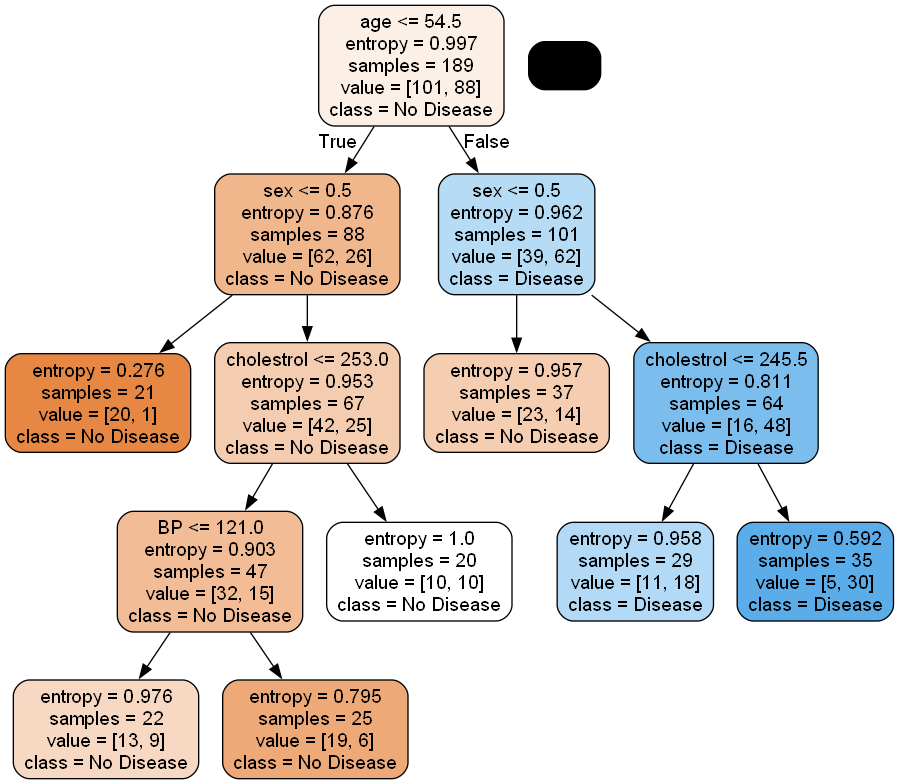

In [36]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [37]:
evaluate_model(dt_min_leaf_entropy)

Train Set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set Performance
0.6419753086419753
[[38 11]
 [18 14]]


### Hyper-Parameter tuning using Grid Search CV

In [38]:
dt = DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [41]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [42]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 672 ms
Wall time: 58.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [43]:
cv_df=pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023436,0.013532,0.019533,0.006765,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.015625,0.000003,0.011717,0.006765,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.011718,0.006766,0.007811,0.007811,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.011717,0.006765,0.007813,0.007813,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.007813,0.007813,0.011717,0.006765,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [44]:
cv_df.shape

(50, 15)

In [45]:
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.016723,0.007798,0.009101,0.009282,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.042966,0.030003,0.007812,0.007812,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.011717,0.006765,0.007813,0.007813,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.023437,0.023435,0.019530,0.025613,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.019530,0.006765,0.003906,0.006766,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [46]:
grid_search.best_score_

0.6669991134751774

In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [48]:
dt_best = grid_search.best_estimator_

In [49]:
evaluate_model(dt_best)

Train Set Performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set Performance
0.6172839506172839
[[36 13]
 [18 14]]


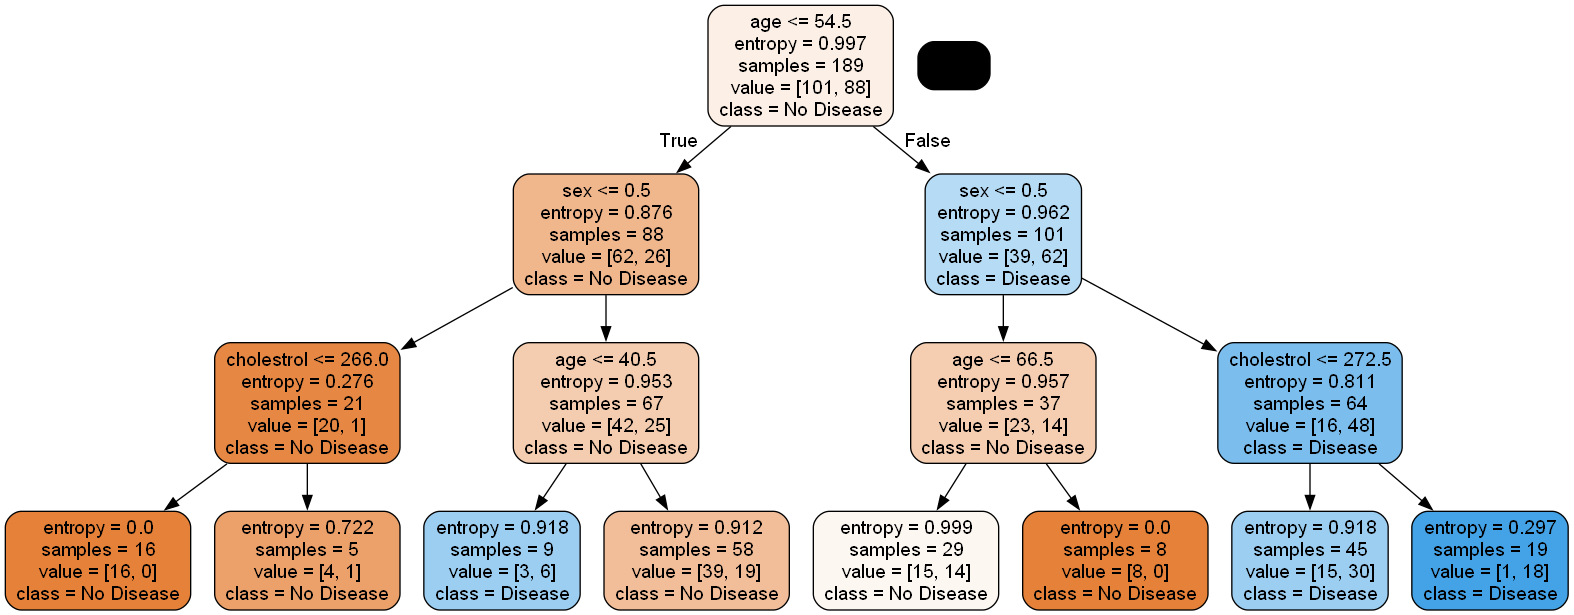

In [50]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Using Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [53]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [54]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [56]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [57]:
sample_tree = rf.estimators_[4]

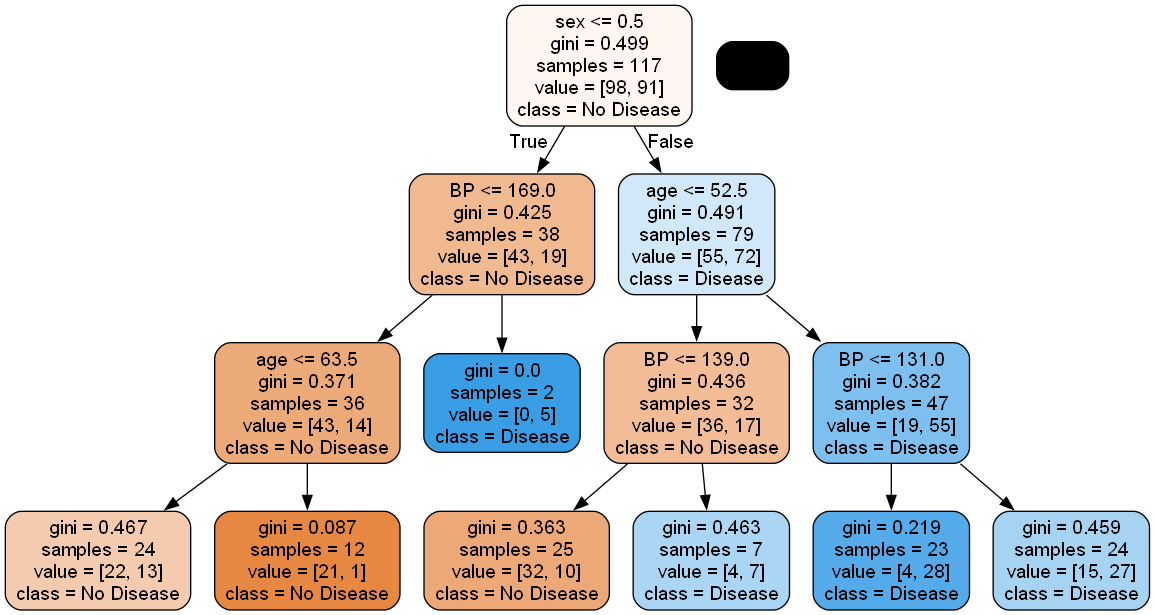

In [58]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [59]:
sample_tree = rf.estimators_[2]

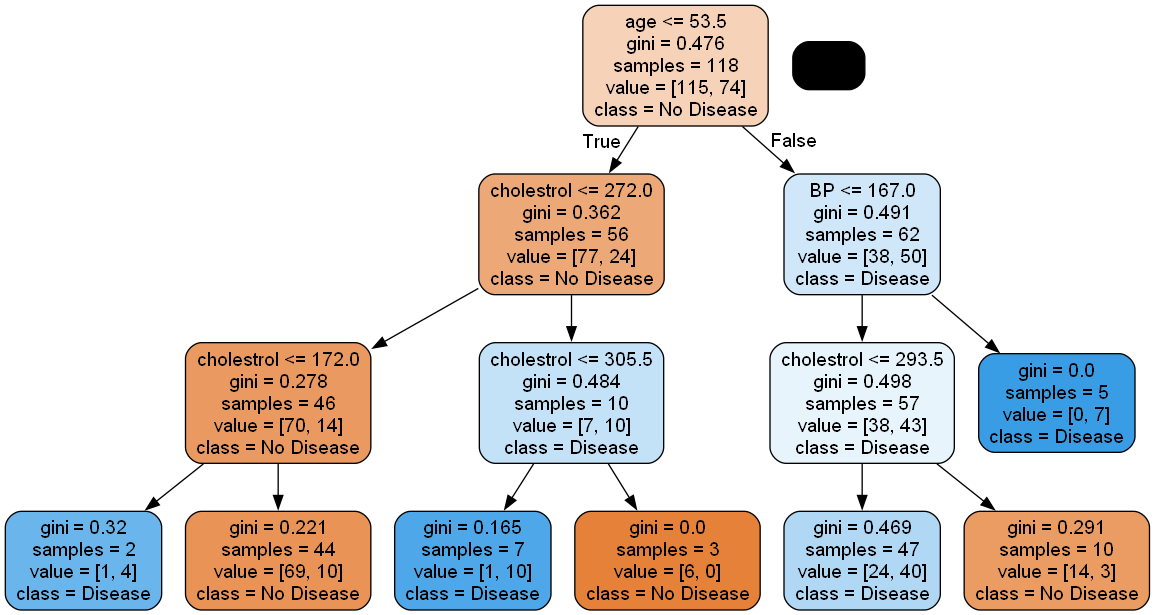

In [60]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

## OOB Score

In [61]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [63]:
rf.oob_score_

0.6349206349206349

**Grid Search for hyper-parameter tuning**

In [64]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [65]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [66]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [69]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 10.4 s
Wall time: 21min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [70]:
rf_best = grid_search.best_estimator_

In [71]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [72]:
evaluate_model(rf_best)

Train Set Performance
0.8042328042328042
[[87 14]
 [23 65]]
--------------------------------------------------
Test set Performance
0.8024691358024691
[[42  7]
 [ 9 23]]


In [73]:
sample_tree = rf_best.estimators_[0]

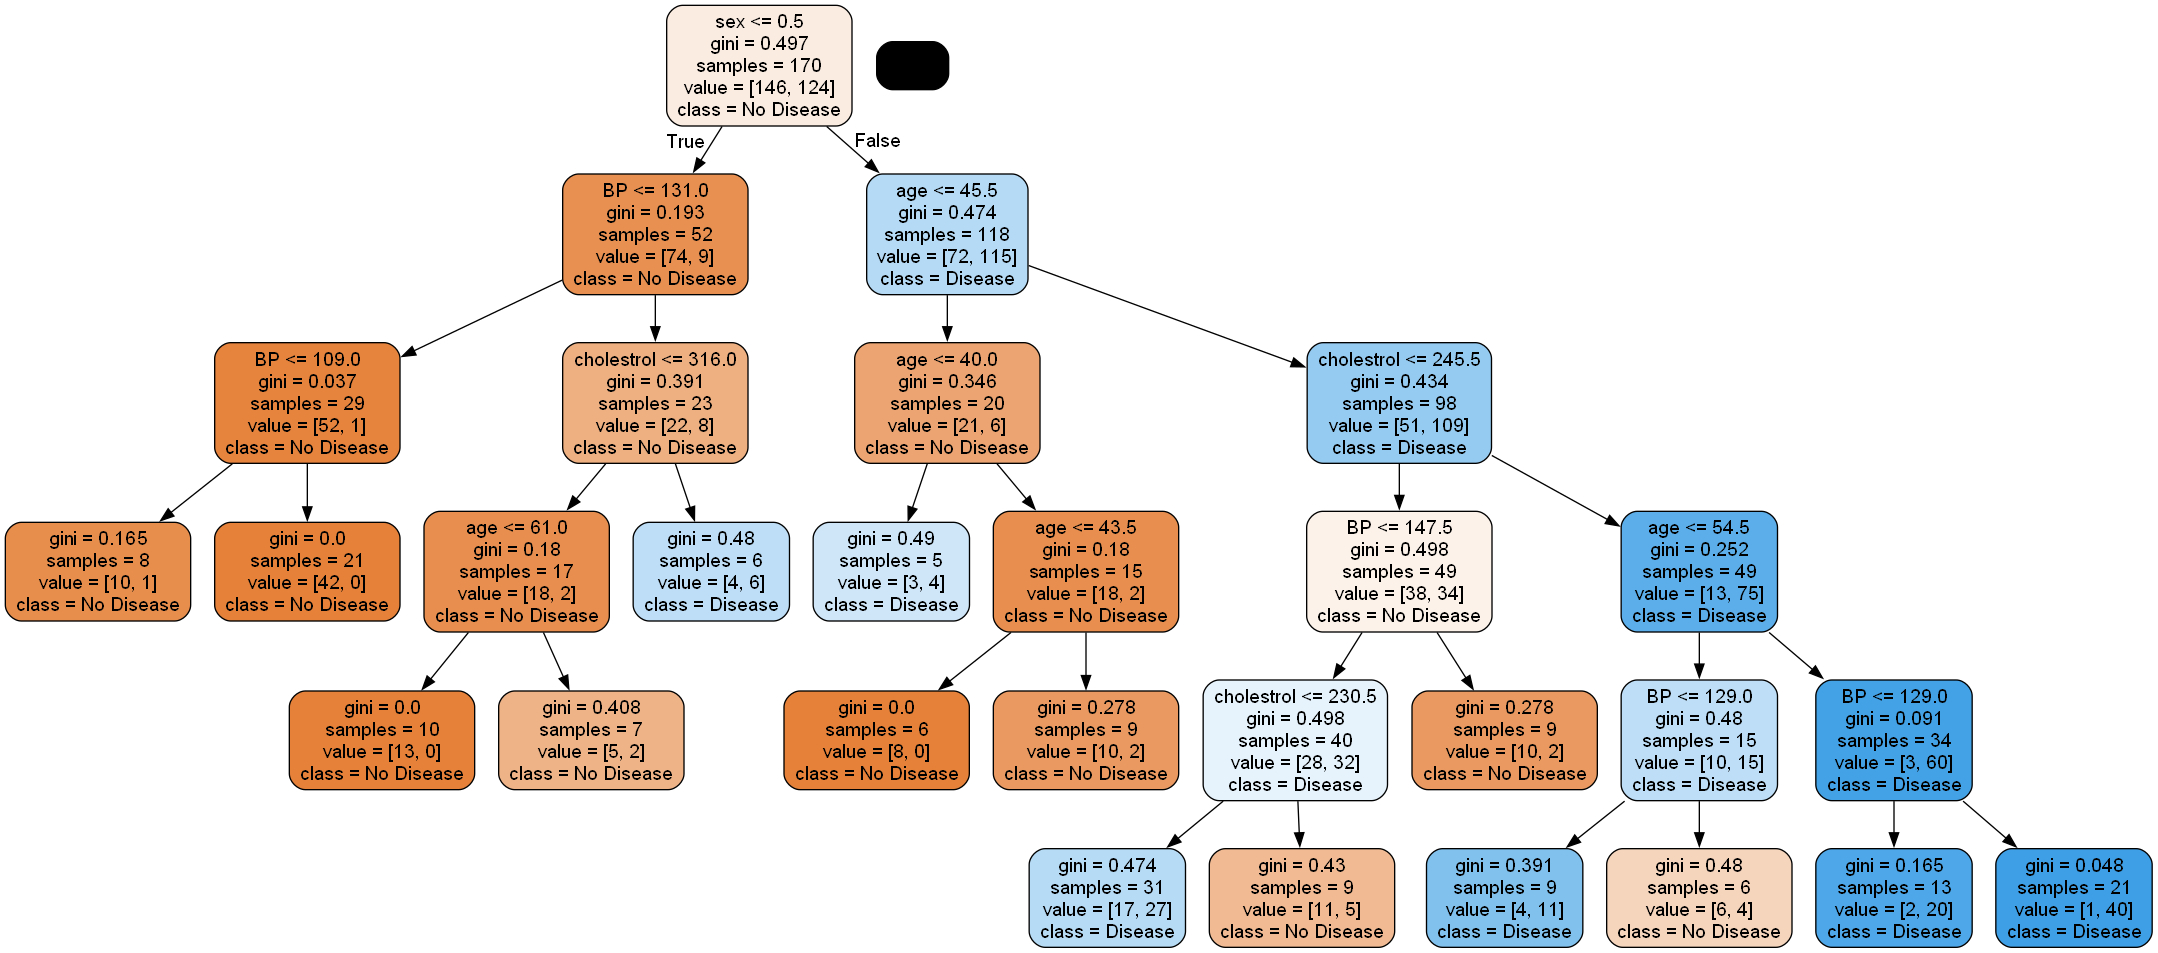

In [74]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [75]:
sample_tree = rf_best.estimators_[10]

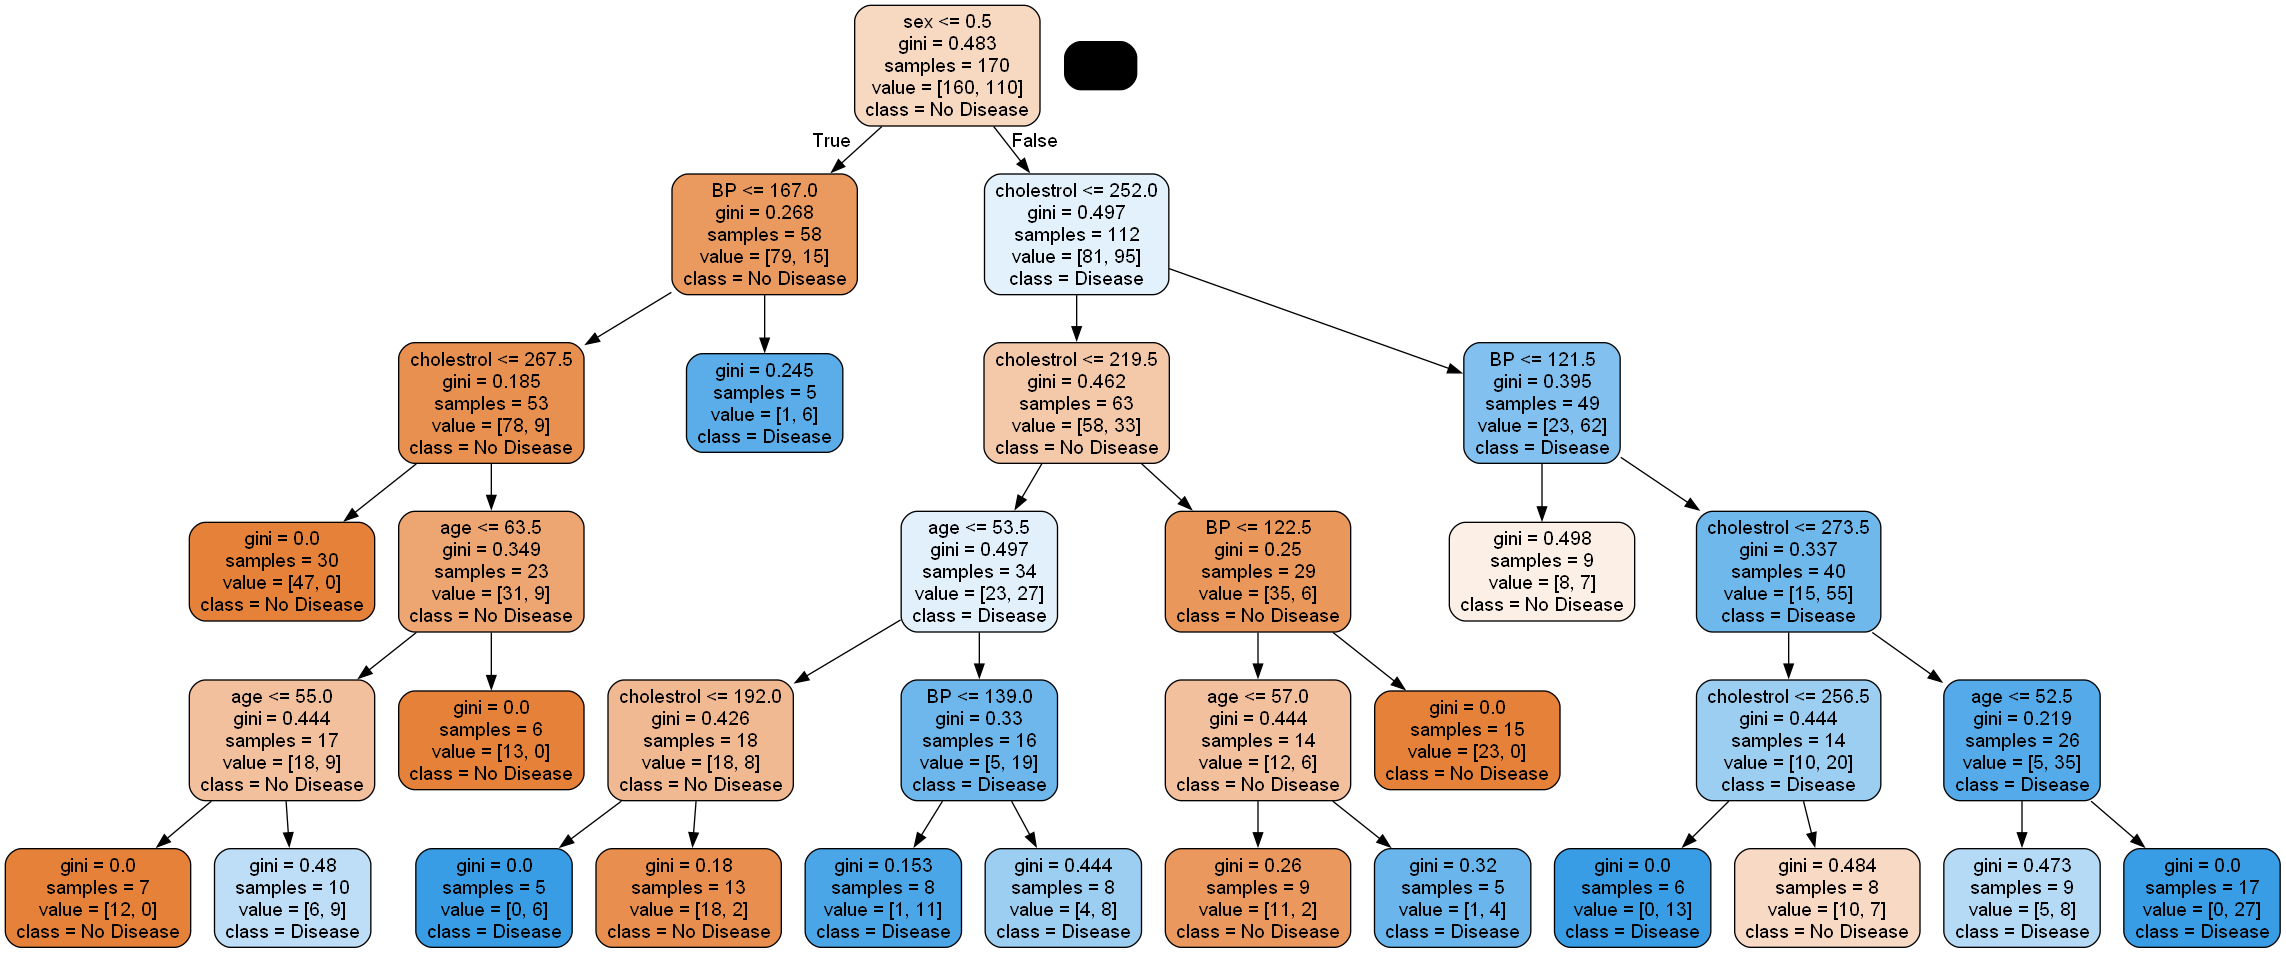

In [76]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

## Varaible importance in RandomForest and Decision trees

In [77]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=5, n_estimators=100, oob_score=True)

In [78]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=1, oob_score=True, random_state=42)

In [79]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [83]:
imp_df=pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [85]:
imp_df.sort_values(by='Imp', ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
